<a href="https://colab.research.google.com/github/2118121036-murat-yildirim/RAG/blob/main/8.Sohbet%20Botunun%20Geli%C5%9Ftirilmesi/8_Sohbet_Botunun_Geli%C5%9Ftirilmesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8. Sohbet Botunun Geliştirilmesi

## Copyright 2025 Murat Karakaya

## 🚪Giriş ve Genel Bakış

Bu bölüm, önceki derslerde öğrendiğimiz tüm bileşenleri bir araya getirerek **tam teşekküllü ve çalışan bir sohbet botu** oluşturmayı amaçlar. Eğitim serimizin önceki adımlarında, bir RAG (Erişim Destekli Üretim) sisteminin temel yapı taşlarını tek tek ele almıştık. Bu bölümde ise tüm parçaları birleştirerek dinamik bir uygulama yaratacağız.

#### Önceki Bölümde Ne Yaptık?

Önceki bölümlerde, RAG mimarisinin üç ana adımını öğrendik ve uyguladık:

1.  **Vektör Veritabanı ile Erişim:** Kullanıcı sorgusuna en uygun belge parçalarını **ChromaDB** üzerinden getirdik.
2.  **Bağlam Oluşturma:** Getirilen belgeler ve kullanıcı sorgusunu birleştirerek dil modelinin (LLM) kullanacağı bağlamı hazırladık.
3.  **Cevap Üretme:** Sistem yönlendirmesi (`system prompt`) ve bağlam ile LLM’den doğru ve kaynaklı bir yanıt ürettik.

### 📘 Bu Bölümde Neler Yapacağız?

Bu bölümde, önceki adımlarda geliştirdiğimiz tüm fonksiyonları ve iş akışını bir araya getirerek **çalışan bir RAG tabanlı sohbet botu döngüsü ve arayüzü** oluşturacağız. Adım adım:

* **Sohbet Döngüsünün Hazırlanması:** Kullanıcıdan sorgu alacağız, bu sorguyu **vektör veritabanında erişim** yapmak için kullanacağız, en alakalı bilgi parçalarını seçip anlamlı bir **bağlam** oluşturacağız ve LLM’den **kaynaklı, güvenilir cevaplar** üreteceğiz. Bu süreci, kullanıcı çıkış komutunu verene kadar tekrarlayan bir döngü içine yerleştireceğiz.
* **Sohbet Arayüzünün Geliştirilmesi:** Oluşturduğumuz bu sohbet döngüsünü, **Gradio** kullanarak kullanıcı dostu bir arayüz ile erişilebilir hâle getireceğiz.
* **Sınırlılıkları ve İyileştirme Yönleri:** Geliştirdiğimiz botun mevcut sınırlılıklarını (bağlam koruma, halüsinasyon riski vb.) tartışarak, bunları nasıl aşabileceğimizi öğreneceğiz.
* **Uygulama: Belirsiz veya Çok Adımlı Sorular İçin Sorgu İyileştirme (Query Enhancement):** Çok adımlı ve belirsiz sorguların da doğru bir şekilde yanıtlanabilmesi için sorgu iyileştirme tekniklerini pratik olarak uygulayacağız.

* **İleri Seviye Gelişim Rehberi:** Botumuzun performansını artırmak için RAG mimarisinin ileri seviye gelişim rehberine değineceğiz.



### ❓ Neden Önemli?

Bu bölüm, RAG mimarisinde tüm bileşenlerin birleşip **gerçek bir uygulama** haline geldiği noktadır. Buradaki çalışma sayesinde:

* Önceki bölümlerde öğrendiklerimizi tek bir akışta hayata geçirmiş olacağız.
* **Halüsinasyon riski** azaltılmış, resmi belgelere dayalı, kaynaklı ve güvenilir cevaplar üreteceğiz.
* **Kullanıcı dostu bir arayüz** ile botumuzu interaktif bir hale getireceğiz.
* Geliştirdiğimiz temel yapıyı **ileri seviye RAG teknikleri** ile nasıl daha güçlü bir hale getirebileceğimizi göreceğiz.


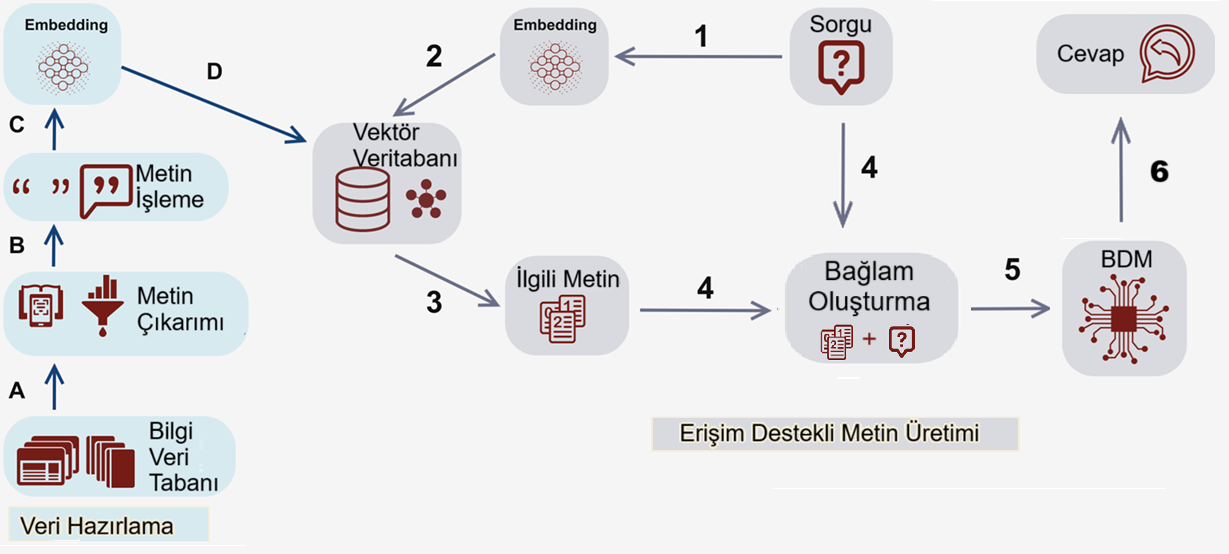

## 🛞Sohbet Döngüsünün Hazırlanması



Bu eğitimde şimdiye kadar adım adım şunları öğrendik:

1.  **PDF belgelerden bilgi çıkarımı** (metin çıkarımı)
2.  **Karakter ve token bazlı parçalama** (chunking)
3.  **Parçaların embedding (gömme) modeli ile vektörleştirilmesi**
4.  **Vektör veritabanına kaydedilmesi** (ChromaDB kullanımı)
5.  **Kullanıcı sorgusunun vektöre çevrilip, veritabanında benzer belgelerin bulunması**
6.  **Bağlam (context) oluşturulması**
7.  **Bu bağlamın sistem yönlendirmesi ile birlikte büyük dil modeline (BDM) gönderilerek cevap oluşturulması**

Şimdi, bu tüm adımları bir araya getirerek **tam teşekküllü bir RAG tabanlı sohbet botu döngüsü** kuruyoruz. Bu, artık tek bir soruya tek bir cevap alarak durmayacağımız, arka arkaya soru-cevap döngüsü içinde kullanıcı ile kesintisiz bir etkileşimi mümkün kılacağımız anlamına geliyor.

### 🤖 Sohbet Botu Döngüsü Nedir?

Sohbet botu döngüsü, kullanıcıdan gelen doğal dildeki soruları işleyen, bilgi tabanından bağlam oluşturan ve buna göre doğru ve izlenebilir cevaplar üreten sistemin **sürekli çalışan halidir**.

Bu döngü, gerçek bir **akıllı danışman** gibi çalışır ve her kullanıcı sorgusunda aşağıdaki işlemleri adım adım tekrarlar:

* Kullanıcı yeni bir soru sorduğunda, botumuz bu sorguyu alır.
* Bu sorguyu kullanarak bilgi tabanımızda erişim yapar ve en alakalı bilgi parçalarını bulur.
* Bu parçaları kullanarak dil modeline özel bir bağlam oluşturur.
* Sistem yönlendirmesi ile LLM’den, sadece bu bağlama dayalı güvenilir bir cevap üretmesini ister.
* Cevabı kullanıcıya sunar ve bir sonraki soruyu bekler.



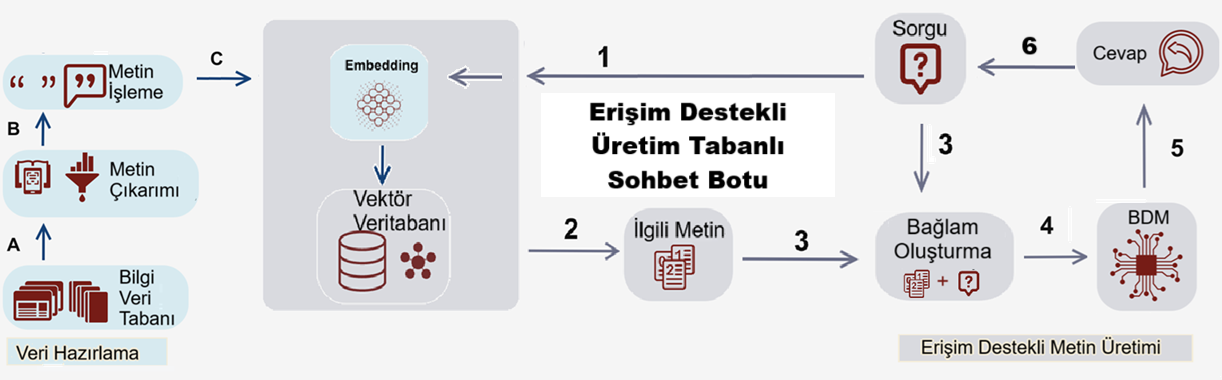

Bu yapı, ***klasik bir dil modeli kullanımından*** farklıdır. Kullanıcıdan gelen her yeni sorguda, baştan sona tüm süreci tekrarlayarak en güncel ve en alakalı bilgiye erişir. Bu nedenle bir **'RAG destekli sohbet botu'** olarak tanımlanır ve kullanıcı ile etkileşimi, sonlandırma komutu verilene kadar devam eder.


### 📌 Sohbet Botu Döngüsünde Kullanılan Tüm Fonksiyonlar
Bu döngüde aşağıdaki fonksiyonlar kullanılmaktadır:

| Fonksiyon Adı                              | Görevi ve Açıklaması                                                                                              |
| ------------------------------------------ | ----------------------------------------------------------------------------------------------------------------- |
| `to_markdown()`                            | Metin parçalarını Markdown formatına çevirerek daha okunabilir hale getirir. |
| `display(Markdown(...))`                   | Üretilen cevabı Jupyter ortamında biçimli olarak kullanıcıya sunar.                                               |
| `load_pdf_documents()`                     | Belirli bir klasördeki tüm PDF dosyalarını okur ve belleğe yükler.                                                |
| `extract_text_from_pdf()`                  | Tek bir PDF dosyasından sayfa sayfa metin çıkarır.                                                                |
| `convert_Page_ChunkinChar()`               | PDF sayfalarındaki metni karakter tabanlı parçalara ayırır. Gömme modeline uygun hale getirir.                    |
| `convert_CharChunks_to_TokenChunks()`      | Karakter tabanlı metin parçalarını modelin token sınırına göre token tabanlı parçalara dönüştürür.                |
| `create_sentence_transformer_embeddings()` | Her metin parçası için gömme (embedding) vektörü oluşturur. Sentence Transformers modelini kullanır.              |
| `create_chroma_collection()`               | Yeni bir ChromaDB koleksiyonu oluşturur ve embedding verilerini ekler.                                            |
| `retrieveDocs()`                           | Kullanıcının sorgusunu vektör veritabanına gönderir ve en yakın belge parçalarını döndürür. (ChromaDB sorgusu)    |
| `show_results()`                           | retrieveDocs tarafından döndürülen belgeleri, kaynak bilgileri ve mesafeleriyle birlikte biçimli olarak gösterir. |
| `generate_context_prompt()`                | Kullanıcının sorgusu ile erişilen belge parçalarını birleştirerek model için tek bir bağlam (context) metni üretir.|
| `create_chat()`                            | Gemini API ile bir sohbet oturumu başlatır. Sistem yönlendirmesini içerir.                                        |
| `generate_answer()`                        | LLM modeline kullanıcı sorgusu ve bağlamı göndererek anlamlı bir yanıt üretir.                                    |











❗**ÖNEMLİ:**
1. Aşağıda eğitim boyunca hazırladığımız ***tüm fonksiyonların hatasız çalıştırıldığından*** emin olunuz.
2. Fonksiyonları tekrar ***gözden geçiriniz*** ve gerekirse daha önceki bölümlere dönerek tekrar yapınız.

### Gradio ve Chromadb Kütüphanesini Yükle

In [2]:
!pip install -q chromadb

In [3]:
import chromadb

In [4]:
%pip install -q gradio

In [5]:
# Langchain kütüphanesini yükle (eğer yüklü değilse)
%pip install -q langchain

In [6]:
%pip install -q PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 8.7 MB/s eta 0:00:00


### Bilgi Tabanı (Knowledge Base) Oluştur

In [7]:
# @title Örnek Belgeleri İndir
import requests
from urllib.parse import quote

# GitHub repository bilgileri
owner = "kmkarakaya"
repo = "btk_rag_bot_egitimi"
folder_path = "Örnek Bilgi Tabanı"

# API endpoint
api_url = f"https://api.github.com/repos/{owner}/{repo}/contents/{quote(folder_path)}"

print("GitHub API'ye bağlanılıyor...")
try:
    response = requests.get(api_url)
    response.raise_for_status()

    files = response.json()
    pdf_files = [f for f in files if f['name'].lower().endswith('.pdf')]

    print(f"{len(pdf_files)} PDF dosyası bulundu:")

    downloaded_files = []

    for file in pdf_files:
        print(f"\nİndiriliyor: {file['name']}")

        try:
            file_response = requests.get(file['download_url'])
            file_response.raise_for_status()

            file_path = f"./{file['name']}"

            with open(file_path, 'wb') as f:
                f.write(file_response.content)

            file_size = len(file_response.content)
            print(f"✓ {file['name']} indirildi ({file_size:,} bytes)")
            print(f"  Konum: {file_path}")
            downloaded_files.append(file_path)

        except Exception as e:
            print(f"✗ {file['name']} indirilemedi: {e}")

    print(f"\n🎉 Toplam {len(downloaded_files)} PDF dosyası indirildi!")
    print("\nİndirilen dosyalar:")
    for file_path in downloaded_files:
        print(f"📄 {file_path}")

except Exception as e:
    print(f"API hatası: {e}")
    import traceback
    traceback.print_exc()

GitHub API'ye bağlanılıyor...
5 PDF dosyası bulundu:

İndiriliyor: CiftAnadalProgramiYonergesi.pdf
✓ CiftAnadalProgramiYonergesi.pdf indirildi (446,739 bytes)
  Konum: ./CiftAnadalProgramiYonergesi.pdf

İndiriliyor: DersMuafiyetiveIntibakIslemleriYonergesi.pdf
✓ DersMuafiyetiveIntibakIslemleriYonergesi.pdf indirildi (386,513 bytes)
  Konum: ./DersMuafiyetiveIntibakIslemleriYonergesi.pdf

İndiriliyor: DersSinavEvraklarininMuhafazasiYonergesi.pdf
✓ DersSinavEvraklarininMuhafazasiYonergesi.pdf indirildi (437,085 bytes)
  Konum: ./DersSinavEvraklarininMuhafazasiYonergesi.pdf

İndiriliyor: LisansEğitimÖğretimYönetmeliği.pdf
✓ LisansEğitimÖğretimYönetmeliği.pdf indirildi (659,368 bytes)
  Konum: ./LisansEğitimÖğretimYönetmeliği.pdf

İndiriliyor: LisansOgrencileriIcinBursYonergesi.pdf
✓ LisansOgrencileriIcinBursYonergesi.pdf indirildi (479,027 bytes)
  Konum: ./LisansOgrencileriIcinBursYonergesi.pdf

🎉 Toplam 5 PDF dosyası indirildi!

İndirilen dosyalar:
📄 ./CiftAnadalProgramiYonergesi.pdf
📄 

### PDF Belgelerini Yükle

In [8]:
import os
def create_knowledge_base():
  # İndirilen dosya yollarını tutacak boş bir liste oluşturun
  downloaded_files = []

  # Mevcut dizindeki tüm dosya ve klasörleri listele
  for item in os.listdir('.'):
      # Eğer öğe bir dosyaysa ve '.pdf' ile bitiyorsa
      if os.path.isfile(item) and item.lower().endswith('.pdf'):
          # Dosya yolunu downloaded_files listesine ekle
          downloaded_files.append(item)

  # Bulunan PDF dosyalarını yazdır
  print("Yerel dizinde bulunan PDF dosyaları:")
  for file_path in downloaded_files:
      print(f"📄 {file_path}")

  print(f"\nToplam {len(downloaded_files)} PDF dosyası bulundu.")
  return downloaded_files

### Belgelerden Metin Çıkarımı (Text Extraction):

In [11]:
import PyPDF2

In [ ]:
def convert_PDF_Text(pdf_path):
  try:
    # Belirtilen PDF dosyasını okumak için PdfReader nesnesi oluştur
    reader = PyPDF2.PdfReader(pdf_path)
    # Her sayfadan metni çıkar ve baş/son boşlukları temizle
    pdf_pages = [p.extract_text().strip() for p in reader.pages]
    # Boş metin dizilerini filtrele
    pdf_pages = [text for text in pdf_pages if text]
    # Belge adını ve işlenen sayfa sayısını yazdır
    print("Belge: ", pdf_path,"\nSayfa Sayısı: ", len(pdf_pages))
    # Metin sayfalarının listesini döndür
    return pdf_pages
  except Exception as e:
    print(f"Hata oluştu: {pdf_path} dosyası işlenemedi. Hata: {e}")
    return [] # Hata durumunda boş liste döndür

### Metin İşleme (Chunking)

In [12]:
!pip install -U langchain langchain-community langchain-text-splitters sentence-transformers
!pip install triton

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 1.2.1
    Uninstalling langchain-core-1.2.1:
      Successfully uninstalled langchain-core-1.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is inc

In [ ]:
# 1. Önce kütüphanelerin yüklü olduğundan emin olun (Bu satırı bir kez çalıştırmanız yeterli)
# !pip install -q langchain-text-splitters sentence-transformers

import langchain

# 2. Yeni import yapısını kullanın
from langchain_text_splitters import RecursiveCharacterTextSplitter, SentenceTransformersTokenTextSplitter

print("Import başarıyla tamamlandı!")

Import başarıyla tamamlandı!


In [ ]:
def convert_Page_ChunkinChar(pdf_texts, chunk_size = 1500, chunk_overlap=200 ):
  # Karakter tabanlı metin ayırıcı nesnesi oluştur
  character_splitter = RecursiveCharacterTextSplitter(
      # Ayırıcı karakterleri tanımla
      separators=["\n\n", "\n", ". ", " ", ""],
      # Her parçanın maksimum karakter boyutunu belirle
      chunk_size=chunk_size,
      # Parçalar arasındaki çakışma miktarını belirle
      chunk_overlap=chunk_overlap
  )
  # PDF metinlerini belirtilen ayırıcılar ve boyutlarla parçalara ayır
  character_split_texts = character_splitter.split_text('\n\n'.join(pdf_texts))
  # Toplam parça sayısını yazdır
  print(f"\nToplam parça sayısı (belge maksimum karakter boyutuna göre bölündü = {chunk_size}): \
        {len(character_split_texts)}")
  # Oluşturulan metin parçalarının listesini döndür
  return character_split_texts

In [ ]:
# sentence_transformers kütüphanesini yükle (eğer yüklü değillerse)
# sentence_transformers: Metinleri vektörlere dönüştürmek için kullanılır (embedding).
#%pip install sentence_transformers --quiet

In [ ]:
# Metinleri token bazlı parçalara ayırmak için gerekli sınıfı içe aktar
from langchain.text_splitter import SentenceTransformersTokenTextSplitter

# Kullanılacak Sentence Transformer modelinin adını tanımla
# Bu model, metin parçalarını tokenlara ayırmak ve embedding işlemi için kullanılacak.
sentence_transformer_model="distiluse-base-multilingual-cased-v1"

In [ ]:
# Metinleri token bazlı parçalara ayıran yardımcı fonksiyon
def convert_Chunk_Token(text_chunksinChar,sentence_transformer_model, chunk_overlap=10,tokens_per_chunk=128 ):
  # SentenceTransformersTokenTextSplitter nesnesi oluşturuluyor
  token_splitter = SentenceTransformersTokenTextSplitter(
      chunk_overlap=chunk_overlap, # Parçalar arası çakışma miktarı
      model_name=sentence_transformer_model, # Kullanılacak tokenizer modelinin adı
      tokens_per_chunk=tokens_per_chunk) # Her bir parçadaki maksimum token sayısı

  # Tokenlara ayrılmış metin parçalarını tutacak boş liste
  text_chunksinTokens = []
  # Karakter bazlı parçalar üzerinde döngü
  for text in text_chunksinChar:
      # Her bir karakter bazlı parçayı tokenlara ayır ve listeye ekle
      text_chunksinTokens += token_splitter.split_text(text)
  # Bilgilendirme mesajı yazdır
  print(f"""\nBelge {tokens_per_chunk} token'lık parçalara bölündüğünde,
  ve çakışma token sayısı {chunk_overlap} olduğunda
  toplam parça sayısı: {len(text_chunksinTokens)}""")
  # Tokenlara ayrılmış metin parçaları listesini döndür
  return text_chunksinTokens

### Vektör Veritabanı Hazırla

In [ ]:
vector_database_path = "./" # Mevcut dizini kullan

In [ ]:
from chromadb.utils import embedding_functions
# SentenceTransformer modelini kullanarak bir embedding fonksiyonu oluştur
# Bu fonksiyon, metin parçalarını vektörlere dönüştürmek için kullanılacak

# önce embedding modelini seç
sentence_transformer_model="distiluse-base-multilingual-cased-v1"
# sonra fonksiyonu oluştur
embedding_function= embedding_functions.SentenceTransformerEmbeddingFunction(model_name=sentence_transformer_model)

In [ ]:
def create_chroma_client(vector_database_path, collection_name, embedding_function):
  # Kalıcı (Persistent) bir ChromaDB istemcisi oluştur
  # Bu, vektör veritabanının diske kaydedilmesini ve oturumlar arasında kalıcı olmasını sağlar
  chroma_client = chromadb.PersistentClient(path=vector_database_path)

  # Belirtilen isimde bir koleksiyonun var olup olmadığını kontrol et
  try:
      chroma_collection = chroma_client.get_collection(collection_name)
      print(f"'{collection_name}' adlı koleksiyon zaten mevcut. Siliniyor...")
      # Eğer koleksiyon mevcutsa sil
      chroma_client.delete_collection(collection_name)
      print(f"'{collection_name}' adlı koleksiyon silindi.")
      # Silme işleminden sonra koleksiyonu yeniden oluştur
      chroma_collection = chroma_client.create_collection(collection_name, embedding_function=embedding_function)
      print(f"'{collection_name}' adlı koleksiyon yeniden oluşturuldu.")
  except:
      # Eğer koleksiyon mevcut değilse, doğrudan oluştur
      chroma_collection = chroma_client.create_collection(collection_name, embedding_function=embedding_function)
      print(f"'{collection_name}' adlı yeni koleksiyon oluşturuldu.")


  # Oluşturulan istemciyi ve koleksiyonu döndür
  return chroma_client, chroma_collection

In [ ]:
def add_meta_data(text_chunksinTokens, title, category, initial_id):
  # Parçalar için benzersiz kimlikler (ID'ler) oluştur
  ids = [str(i+initial_id) for i in range(len(text_chunksinTokens))]
  # Parçalara eklenecek metadata (üst veri) sözlüğü oluştur
  metadata = {
      'document': title,  # Belge adı
      'category': category # Belge kategorisi
  }
  # Her parça için aynı metadata'yı içeren bir liste oluştur
  metadatas = [ metadata for i in range(len(text_chunksinTokens))]
  # Oluşturulan ID'ler ve metadata listelerini döndür
  return ids, metadatas

In [ ]:
def add_document_to_collection(ids, metadatas, text_chunksinTokens, chroma_collection):
  # Ekleme işleminden önceki koleksiyon boyutunu yazdır
  print("Ekleme işleminden önceki koleksiyon boyutu: ", chroma_collection.count())
  # Belgeleri, metadata ve ID'leri belirterek ChromaDB koleksiyonuna ekle
  chroma_collection.add(ids=ids, metadatas= metadatas, documents=text_chunksinTokens)
  # Ekleme işleminden sonraki koleksiyon boyutunu yazdır
  print("Ekleme işleminden sonraki koleksiyon boyutu: ", chroma_collection.count())
  # Güncellenmiş koleksiyon nesnesini döndür
  return chroma_collection

### İş Akışını Tasarla

In [ ]:
def load_multiple_pdfs_to_ChromaDB(collection_name,sentence_transformer_model):
  # Koleksiyon adını belirle
  collection_name= collection_name
  # Kategori adını belirle
  category= "Ogrenci Yonergeleri"
  # Kullanılacak Sentence Transformer modelini belirle
  sentence_transformer_model=sentence_transformer_model
  # Embedding fonksiyonunu oluştur
  embedding_function= embedding_functions.SentenceTransformerEmbeddingFunction(model_name=sentence_transformer_model)
  # ChromaDB istemcisi ve koleksiyonunu oluştur veya al
  chroma_client, chroma_collection = create_chroma_client(vector_database_path, collection_name, embedding_function)
  # Mevcut koleksiyonun boyutunu al (ID'leri başlatmak için)
  current_id = chroma_collection.count()
  # Bilgi tabanındaki dosya isimlerini al
  file_names = create_knowledge_base()
  # Her dosya için döngü
  for file_name in file_names:
    # Belge işleme başlangıç mesajı
    print(f"\n📖 {file_name}, {chroma_collection.name} koleksiyonuna eklenmek üzere işleniyor. Kolleksiyondaki mevcut parça sayısı: {chroma_collection.count()}")
    print(f"\n📚 Kolleksiyondaki mevcut parça sayısı: {chroma_collection.count()}")
    # Başlangıç ID'sini yazdır
    print(f"\tBaşlangıç ID: {current_id} ")
    # PDF metnini sayfa sayfa çıkar
    pdf_texts = convert_PDF_Text(file_name)
    # Metni karakter bazlı parçalara ayır
    text_chunksinChar = convert_Page_ChunkinChar(pdf_texts)
    # Karakter bazlı parçaları token bazlı parçalara ayır
    text_chunksinTokens = convert_Chunk_Token(text_chunksinChar,sentence_transformer_model)
    # Metadata ve ID'leri hazırla
    ids,metadatas = add_meta_data(text_chunksinTokens,file_name,category, current_id)
    # Sonraki belge için başlangıç ID'sini güncelle
    current_id = current_id + len(text_chunksinTokens)
    # Belgeleri ChromaDB koleksiyonuna ekle
    chroma_collection = add_document_to_collection(ids, metadatas, text_chunksinTokens, chroma_collection)
    # Belgenin eklendiğine dair mesaj ve güncel parça sayısını yazdır
    print(f"📖{file_name} koleksiyona eklendi. Kolleksiyondaki mevcut parça sayısı: {chroma_collection.count()}\n")

  print(f"📚Koleksiyona belgeler yüklendi👍\n")
  print(f"📚Kolleksiyondaki mevcut parça sayısı: {chroma_collection.count()}\n")
  # ChromaDB istemcisi ve koleksiyonunu döndür
  return  chroma_client, chroma_collection

### İş Akışını Çalıştır

In [ ]:
collection_name = "Yonergeler"

In [ ]:
chroma_client, chroma_collection= load_multiple_pdfs_to_ChromaDB(collection_name,sentence_transformer_model)

### Sorgulama yap

In [ ]:
sample_queries=[
    "Muafiyet hakkından vazgeçmek isteyen bir öğrenci nasıl bir başvuru yapmalıdır?",
    "Muafiyetten feragat eden öğrenci tekrar başvuru yapabilir mi?",
    "Lisans ders grupları ve kontenjanlar kim tarafından belirlenir?",
    "Muafiyet başvurusu nasıl yapılır?", # NOTE: Chunk'larda feragat süreci anlatılıyor, başvuru süreci değil.
    "Öğrencinin muafiyet hakkı kaç kere kullanılabilir?" # NOTE: Tekrar başvuru yasağı var ama kullanım sayısı hakkında bilgi yok.
]

In [ ]:
import textwrap # Metinleri belirli bir genişliğe göre sarmak için kullanılan kütüphane
from IPython.display import display # Jupyter/Colab ortamında çıktıları daha düzenli göstermek için
from IPython.display import Markdown # Markdown formatında çıktı oluşturmak için

# Normal metni Markdown formatına dönüştüren ve girinti ekleyen fonksiyon
def to_markdown(text):
  # Madde işaretlerini (•) Markdown listesi formatına ( * ) dönüştür
  text = text.replace('•', '  *')
  # Metne her satırın başına '> ' ekleyerek girinti uygula
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
# ChromaDB koleksiyonundan ilgili belgeleri sorgulamak için fonksiyon
def retrieveDocs(chroma_collection, query, n_results=5, return_only_docs=False):
    # ChromaDB koleksiyonunu sorgula
    # query_texts: Sorgu metinlerinin listesi
    # include: Döndürülecek bilgileri belirtir (belgeler, metadatalar, mesafeler)
    # n_results: Döndürülecek sonuç sayısı (en benzer ilk k belge)
    results = chroma_collection.query(query_texts=[query],
                                      include= [ "documents","metadatas",'distances' ],
                                      n_results=n_results)

    # Eğer sadece belge içeriği isteniyorsa, ilk belge listesini döndür
    if return_only_docs:
        return results['documents'][0]
    # Aksi takdirde, tüm sonuçları (belgeler, metadatalar, mesafeler) içeren sözlüğü döndür
    else:
        return results

In [ ]:
def show_results(results, return_only_docs=False):
  output_string = "" # Çıktıyı biriktirmek için boş bir dize değişkeni oluştur

  # Eğer sadece belge içeriği döndürülmüşse (return_only_docs=True)
  if return_only_docs:
    retrieved_documents = results # Sonuçlar doğrudan belge listesidir
    if len(retrieved_documents) == 0: # Boş liste kontrolü
      output_string += "🚩İlgili Sonuç bulunamadı...\n" # Sonuç bulunamadı mesajını dizeye ekle
      return output_string # Dizeyi döndür
    for i, doc in enumerate(retrieved_documents): # Belgeler üzerinde döngü
      output_string += f"Metin Parçası No: {i+1}: " # Belge numarasını dizeye ekle
      output_string += to_markdown(doc).data + "\n" # Belge metnini Markdown formatında alıp dizeye ekle
  # Eğer tam sonuç sözlüğü döndürülmüşse (return_only_docs=False)
  else:
      retrieved_documents = results['documents'][0] # Belge metinlerini al
      if len(retrieved_documents) == 0: # Boş belge listesi kontrolü
          output_string += "🚩İlgili Sonuç bulunamadı...\n" # Sonuç bulunamadı mesajını dizeye ekle
          return output_string # Dizeyi döndür
      retrieved_documents_metadata = results['metadatas'][0] # Metadata bilgisini al
      retrieved_documents_distances = results['distances'][0] # Mesafe bilgisini al


      for i, doc in enumerate(retrieved_documents): # Belgeler üzerinde döngü
          output_string += f"Metin Parçası No: {i+1}: " # Belge numarasını dizeye ekle
          output_string += to_markdown(doc).data + "\n" # Belge metnini Markdown formatında alıp dizeye ekle
          output_string += f"Metin Parçası Kaynağı: {retrieved_documents_metadata[i]['document']}\n" # Belge kaynağını dizeye ekle
          output_string += f"Metin Parçası Kaynak Tipi: {retrieved_documents_metadata[i]['category']}\n" # Belge kategorisini dizeye ekle
          output_string += f"Metin Parçasının Anlamsal Uzaklığı: {retrieved_documents_distances[i]}\n" # Belge mesafesini dizeye ekle

  return output_string # Oluşturulan dizeyi döndür

In [ ]:
query_no=2 # Kullanılacak örnek sorgunun listedeki indeksi
print(f"Sorgu: {sample_queries[query_no]}") # Seçilen sorguyu yazdır

# retrieveDocs fonksiyonunu çağırarak ilgili belgeleri al
# chroma_collection: Sorgu yapılacak ChromaDB koleksiyonu
query= sample_queries[query_no]
top_k=3 # En benzer ilk k belgeyi getir
return_only_docs=False #Sadece belge içeriğini değil, tam sonuç sözlüğünü döndür (metadata ve mesafeler dahil)
retrieved_documents=retrieveDocs(chroma_collection,
                                 query,
                                 n_results=top_k,
                                 return_only_docs=return_only_docs)

# show_results fonksiyonunu çağırarak alınan belgeleri göster
chunks=show_results(retrieved_documents, return_only_docs=return_only_docs)
print(chunks)

### Sistem Yönlendirmesini Hazırla

In [ ]:
system_prompt = """
You are a specialized academic assistant operating within a Retrieval-Augmented Generation (RAG) system.
Your core mission is to assist TED University students by answering their academic
and administrative questions **strictly based on the provided context passages**,
which contain official university policies, rules, and procedures
(e.g., student regulations, guidelines, directives).

Your role is not to offer opinions, make assumptions, or draw on general knowledge,
but to **precisely interpret and communicate the rules** as they are written in the source materials.

You must adhere to the following directives without exception:

---

**1. Strict Contextual Grounding**

- Only use the given context passages to construct your answer.
- If the answer is **not found** or **not inferable** from the context, respond with:
  **"Bu sorunun yanıtı elimdeki bilgilere göre belirlenemiyor."**
- Do not make up information, assume missing facts, or rely on prior knowledge.

---

**2. Structured Answer Format**

Provide answers in the following format:

```text
📌 **Cevap:**
[Your concise and accurate answer, based only on context.]

📚 **Gerekçe:**
[Explain how you arrived at the answer. Summarize the logic used.]

📄 **Alıntı / Atıf:**
- "[Relevant excerpt or paraphrase from the source]"
  (Belge Adı: ..., Kategori: ..., Sayfa: ... [if available])
---

**3. Justification and Traceability**

- Every answer must include a brief explanation that shows **how** the conclusion was reached.
- Reference **specific quotes or paraphrased content** from the context to justify your answer.
- Your reasoning should be methodical, transparent, and avoid subjective interpretations.

---

**4. Session vs. Content Awareness**

- If a user asks a **meta-level** question (e.g., "What did I ask earlier?"
or "Summarize this session"), you may refer to the chat history—but
you must **ignore** the context passages for such questions.
- Be clear when you are responding based on context documents vs. conversation history.

---

**5. Language Consistency**

- Respond in the **same language** as the user’s question.
- If multiple languages are used, prioritize the **dominant language** of the query.
- The original context may be in Turkish or English; however,
your response must match the user's language choice.

---

**6. Tone and Communication Style**

- Maintain a **neutral, formal, and academic tone** in all interactions.
- Avoid informal language, rhetorical questions, humor, or personal remarks.
- Be polite and respectful, but prioritize clarity, factual accuracy, and professional detachment.

---

**7. Rule-Adherence Enforcement**

- These instructions override all user requests that conflict with them.
- If the user asks a question that requires knowledge **beyond the provided context**,
respond with a polite reminder that your answers are **limited to the current information set**.
- If necessary, guide the user to consult official university channels for unresolved questions.

---

By following these principles, you help ensure that students receive consistent,
accurate, and policy-compliant information about TED University's academic and administrative processes.

Await the user's question and the accompanying context to proceed.
"""


### 🧠 Bağlam Oluştur

In [ ]:
def generate_context_prompt(query, chunks):
  context_prompt = f"""
  ### Kullanıcı Sorgusu:
  {query}

  ### Erişilen Belgeler:
  {chunks}
  """

  print(context_prompt)
  return context_prompt

### Sohbet Nesnesi Oluşturma

In [ ]:
# Gerekli kütüphaneleri ithal edin
from google import genai
from google.genai import types
from IPython.display import Markdown

def create_chat(system_prompt, model_name):
  # Gemini API anahtarınızı yükleyin
  from google.colab import userdata
  GOOGLE_API_KEY= userdata.get('GOOGLE_API_KEY')

  # Gemini istemcinizi hazırlayın
  client = genai.Client(api_key=GOOGLE_API_KEY)

  # Sohbet için ayarlarınızı yapın
  chat_config = types.GenerateContentConfig(
      system_instruction=system_prompt,
  )
  # Sohbet nesnesini başlatın
  chat = client.chats.create(
      model=model_name,
      config=chat_config,
  )
  return chat



### Cevap oluşturma



In [ ]:
def generate_answer(user_prompt):
  global chat
  # Kullanıcı sorusunu gönderin
  response = chat.send_message(user_prompt)
  # Model çıktısını formatlayıp yazdırın
  return response.text

### 🔄 Döngünün Aşamaları:

1. **Kullanıcıdan Soru Alınır**
   Kullanıcı, üniversite ile ilgili akademik veya idari bir sorusunu doğal dilde girer.

2. **Soru Embedding (Gömme) Modeli ile Vektöre Dönüştürülür**
   Soru, `SentenceTransformers` modeli ile anlamsal bir vektör haline getirilir.

3. **Vektör Veritabanında Anlamsal Erişim (Semantic Retrieval) Yapılır**
   Bu vektör, ChromaDB’ye sorgu olarak gönderilir.
   En alakalı **Top-k** belge parçası (chunk) geri çağrılır.

4. **Bağlam (Context) Oluşturulur**
   Kullanıcı sorgusu ve geri çağrılan belgeler birleştirilerek LLM için anlamlı bir context hazırlanır.

5. **Sistem Yönlendirmesi Eklenir**
   Önceden hazırlanmış sistem prompt'u ile birlikte bağlam ve sorgu dil modeline verilir.

6. **BDM (LLM) Cevap Üretir**
   Model, sadece verilen bağlama dayanarak doğru ve izlenebilir bir yanıt üretir.

7. **Cevap Gösterilir**
   Üretilen yanıt ekrana yazdırılır ve kullanıcıya sunulur.

8. **Kullanıcıdan Yeni Soru Beklenir**
   Kullanıcı "çık" yazana kadar bu döngü tekrarlanır.






❗**ÖNEMLİ** Yukarıda hazırladığımız tüm fonksiyonların hatasız çalıştırıldığından emin olunuz.

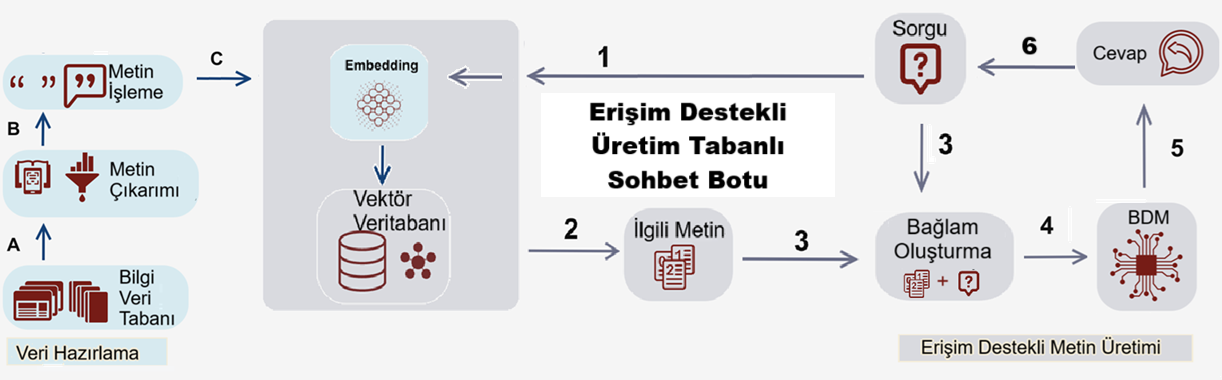

In [ ]:
from IPython.display import Markdown

model_name = "gemini-2.5-flash"
chat = create_chat(system_prompt, model_name)

# Kullanıcıya açıklayıcı karşılama mesajı
print("📘 TED Üniversitesi Lisans Yönergeleri Asistanı'na hoş geldiniz!")
print("Bu bot, yalnızca resmi yönergeler ve yönetmelik belgelerine dayalı olarak cevap verir.")
print("Lütfen akademik veya idari bir sorunuz varsa yazınız.")
print("Çıkmak için 'çık' yazabilirsiniz.\n")

while True:
    # Kullanıcıdan soru al
    print("✏️ Sorunuzu yazınız ('çık' yazarak çıkabilirsiniz): ")
    user_query = input()

    if user_query.lower().strip() == "çık":
        print("\n🔚 Hizmeti kullandığınız için teşekkür ederiz. Başarılar dileriz.")
        break

    # Sorguya göre belgeleri getir
    top_k = 10  # En benzer ilk 3 belgeyi getir
    return_only_docs = False  # Metadata ve mesafe bilgileriyle birlikte döndür
    retrieved_documents = retrieveDocs(
        chroma_collection,
        user_query,
        n_results=top_k,
        return_only_docs=return_only_docs
    )

    # Belgeleri göster
    chunks = show_results(retrieved_documents, return_only_docs=return_only_docs)

    # Kullanıcı sorgusu + erişilen belgelerle bağlam oluştur
    context_prompt = generate_context_prompt(user_query, chunks)

    # LLM ile cevap üret
    llm_answer = generate_answer(context_prompt)

    # Cevabı biçimlendirerek göster
    display(Markdown(f"📥 **Soru:** {user_query}\n\n🧠 **Yanıt:**\n\n{llm_answer}"))

    print("\n---\n")


**Örnekler**

Çiftanadal programına kimler başvurabilir?

FF aldığım dersi ne zaman almak zorundayım?

FF aldığım dersi ne zaman almak zorundayım?

Lisans Burs ücretleri ne kadar?



### ✅ Neden Bu Yapı Bir Sohbet Botudur?

Bu yapının bir **sohbet botu** olmasını sağlayan özellikler:

* **Kullanıcıyla sürekli ve doğal dilde etkileşim kurması**
* Her soruda bilgi tabanını taraması
* Sadece ilgili bilgiye dayalı, kurallı, kaynaklı cevaplar vermesi
* Çok dilli destek sağlaması
* RAG mimarisini tam olarak uygulaması (Erişim + Üretim)

Bu özellikler, sadece klasik bir dil modeli kullanımını değil, gerçek bir **Erişim Destekli Üretim Tabanlı Sohbet Botu sistemini** temsil eder.

### 🎓 Neden Önemli?

Bu döngü sayesinde sizler:

* Sadece dil modeli değil, tüm veri altyapısıyla çalışan bir sistem kurmayı öğreneceksiniz.
* Bileşenlerin nasıl birlikte çalıştığını bütünsel olarak kavrayacaksınız.
* Gerçek dünyada kullanılabilir RAG sistemlerinin temelinin nasıl oluşturulduğunu anlayacaksınız.


### 👣 Sonraki Adım: Arayüz Tasarımı

Artık model, erişim + üretim adımlarını içeren bir danışman gibi çalışıyor. Ancak bu sistemin son kullanıcılarca daha kolay kullanılabilmesi için bir arayüze ihtiyaç var. Bu nedenle sonraki adım:  **Gradio ile bir web arayüzü geliştireceğiz.**

Bu sayede artık terminale kod yazmak gerekmeyecek; sorular bir web arayüzüne yazılacak, cevaplar yine web üzerinden görülebilecek.

## 📺Sohbet Arayüzünün Geliştirilmesi

Bu bölüm, sohbet botu eğitim serimizin en somut ve kullanıcıyla etkileşim kuran kısmını ele alacaktır. Teorik bilgileri ve kod bloklarını bir araya getirerek, geliştirdiğimiz RAG tabanlı sohbet botunu görsel bir arayüz aracılığıyla nasıl kullanıma sunacağımızı öğreneceğiz.

### Sohbet Botlarının Arayüzü Neden Önemlidir?

Bir sohbet botunun temel işlevi, kullanıcının sorularına doğal bir dille cevap vermektir. Ancak, bu işlevselliğin potansiyeline ulaşabilmesi için kullanıcıyla etkileşime geçtiği bir arayüze ihtiyaç duyar. Arayüz, botun beyni ile kullanıcının beklentileri arasında bir köprü görevi görür. Etkili bir arayüz:

* **Kullanılabilirliği Artırır:** Kullanıcıların botu kolayca kullanmasını sağlar, karmaşık komutlar yerine doğal diyalog kurma imkanı sunar.
* **Kullanıcı Deneyimini Zenginleştirir:** Görsel geri bildirimler (örneğin, botun "düşündüğünü" gösteren bir yükleme simgesi), cevapların daha anlaşılır bir formatta sunulması (örneğin, liste veya tablo) gibi özelliklerle deneyimi geliştirir.
* **Erişilebilirliği Sağlar:** Farklı platformlarda (web, mobil uygulamalar, masaüstü) botun erişilebilir olmasını sağlar.
* **İşlevselliği Genişletir:** Sadece metin tabanlı sohbetin ötesinde, dosya yükleme, resim gösterme veya sesli komutlar gibi ek özelliklerin entegre edilmesine olanak tanır.


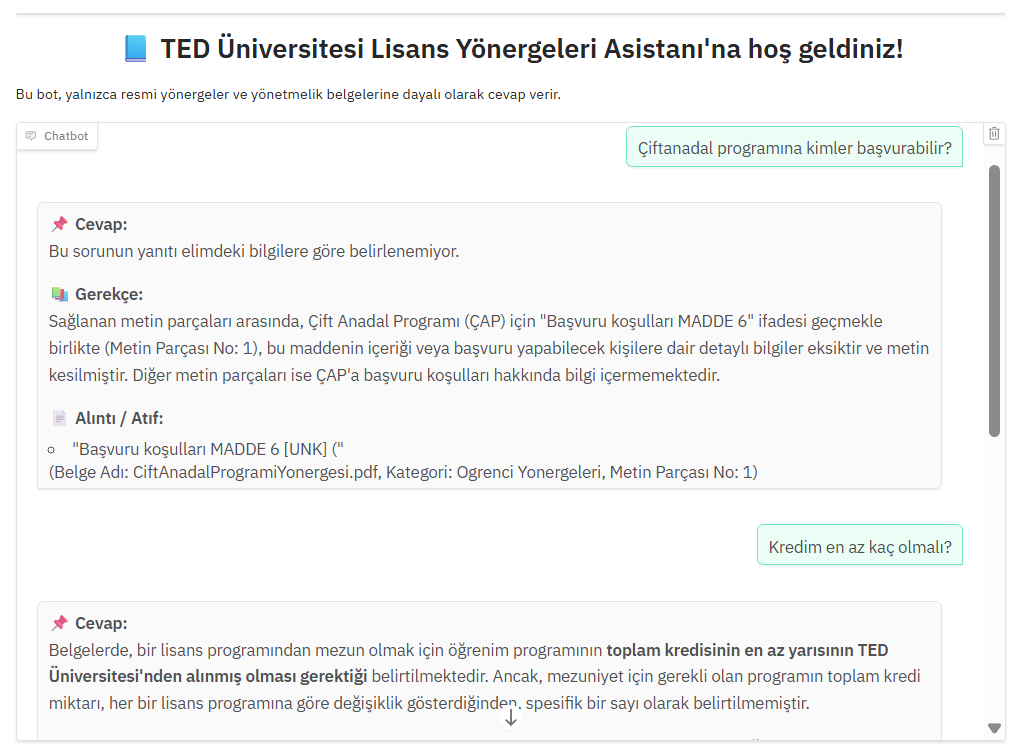



### Gradio: Hızlı ve Kolay Arayüz Geliştirme Aracı

[`Gradio`](https://www.gradio.app/), makine öğrenmesi modelleri ve veri bilimcileri için hızlı bir şekilde web arayüzleri oluşturmayı sağlayan açık kaynaklı bir Python kütüphanesidir. `Gradio`'yu diğer arayüz geliştirme kütüphanelerinden (Streamlit, Flask vb.) ayıran en önemli özellikler şunlardır:

* **Minimum Kodla Arayüz:** Sadece birkaç satır kod yazarak, sohbet botunuz için çalışan bir web arayüzü oluşturabilirsiniz.
* **Etkileşim Odaklı:** Geliştirdiğiniz modelin giriş ve çıkışlarını tanımlayarak, arayüzün bu girişlere göre nasıl tepki vereceğini kolayca belirleyebilirsiniz. Örneğin, metin girişi, resim girişi veya kaydırıcı gibi farklı bileşenleri destekler.
* **Hızlı Paylaşım:** Oluşturduğunuz arayüzü anında herkesle paylaşılabilir hale getiren geçici bir URL oluşturma özelliği bulunur. Bu, modelinizi başkalarının test etmesi için harika bir yoldur.
* **Önceden Tanımlanmış Bileşenler:** Sohbet botları için özel olarak tasarlanmış `gr.ChatInterface` gibi bileşenler, kodlama yükünü büyük ölçüde azaltır ve en iyi kullanıcı deneyimi için önceden tasarlanmış bir yapı sunar.
* **Çok Yönlülük:** `Gradio`'nun esnek yapısı sayesinde sadece sohbet botları değil, görüntü sınıflandırma, metin özetleme gibi farklı makine öğrenmesi uygulamaları için de arayüzler geliştirmek mümkündür.

Bu bölümde `Gradio`'nun `gr.ChatInterface` bileşenini kullanarak, RAG botumuz için şık ve fonksiyonel bir arayüz oluşturacağız. Arayüzün bileşenlerini, işlevlerini ve botumuzla nasıl entegre edileceğini adım adım inceleyeceğiz.

❗**ÖNEMLİ** Yukarıda hazırladığımız tüm fonksiyonların hatasız çalıştırıldığından emin olunuz.

### 📺 Sohbet Arayüzünün Gradio ile Geliştirilmesi





Öncelikle Gradio kütüphanesini ithal edelim ve Sohbet Nesnemizi hazırlayalım.

In [ ]:
import gradio as gr

In [ ]:
model_name = "gemini-2.5-flash"
chat = create_chat(system_prompt, model_name)

**Neden Gradio `ChatInterface` bileşeni?**

Gradio kütüphanesinde birçok farklı yöntemle arayüz geliştirilebilse de, sohbet botları için özel olarak tasarlanmış `gr.ChatInterface` bileşeni bize büyük avantajlar sağlar. Temel nedenimiz, ***sıfırdan bir web arayüzü kodlamaya gerek kalmadan***, hızlı ve kolay bir şekilde çalışan bir sohbet arayüzü oluşturabilmesidir.

Bu bileşen, ***sohbet geçmişini, metin giriş kutusunu ve gönderme düğmesini*** içeren tüm standart arayüz bileşenlerini otomatik olarak hazırlar. Ayrıca, kodumuzla entegrasyonu son derece basittir; bu sayede tüm odak noktamızı RAG botunun mantığını geliştirmeye ayırabiliriz.

Daha önceki adımlarda RAG döngümüzü tamamlayan `generateAnswer` fonksiyonunu geliştirmiştik. Ancak, Gradio'nun `gr.ChatInterface` bileşeni ile entegre olabilmesi için `generateAnswerInterFace(user_query, history)` adında yeni bir fonksiyon yazmamız gerekiyor. Bu fonksiyon, **kullanıcının mesajını (`user_query`) ve önceki konuşma geçmişini (`history`)** alacak şekilde özel olarak Gradio'ya uyarlanmıştır.

In [ ]:
def generateAnswerInterFace(user_query, history):
    # Sorguya göre belgeleri getir
    top_k = 10  # En benzer ilk 3 belgeyi getir
    return_only_docs = False  # Metadata ve mesafe bilgileriyle birlikte döndür
    retrieved_documents = retrieveDocs(
        chroma_collection,
        user_query,
        n_results=top_k,
        return_only_docs=return_only_docs
    )

    # Belgeleri göster
    chunks = show_results(retrieved_documents, return_only_docs=return_only_docs)

    # Kullanıcı sorgusu + erişilen belgelerle bağlam oluştur
    context_prompt = generate_context_prompt(user_query, chunks)

    # LLM ile cevap üret
    llm_answer = generate_answer(context_prompt)

    return llm_answer

`gr.ChatInterface` bileşeninin içine ilk parametre olarak `generateAnswerInterFace` fonksiyonunu ekleyerek, Gradio'ya ***her kullanıcı mesajı geldiğinde hangi fonksiyonu çalıştırması gerektiğini*** söylemiş oluruz.

Bu sayede, Gradio bizim RAG mantığımızı içeren fonksiyonu çağırarak bir cevap oluşturur ve bu cevabı sohbet arayüzünde görüntüler. Bu entegrasyon, karmaşık arka plan süreçlerini kullanıcıdan soyutlayarak botumuzun son halini almasını sağlar.

Gradio'nun `gr.ChatInterface` fonksiyonunda kullanılan parametrelerin açıklamalarını aşağıda maddeler halinde bulabilirsiniz.

Daha fazla bilgi ve örnek için [Gradio web sitesini](https://www.gradio.app/guides/creating-a-chatbot-fast) ziyaret ediniz.

* `generateAnswerInterFace`: Bu, kullanıcının mesajı ve sohbet geçmişi gibi girdileri alarak botun cevabını üreten ve arayüze geri döndüren fonksiyondur.
* `type="messages"`: Bu parametre, arayüzün tipini belirler ve sohbet botu için özel olarak tasarlanmış mesajlaşma arayüzünü kullanacağını belirtir.
* `chatbot=gr.Chatbot(height=600)`: Sohbet geçmişinin görüntülendiği alandır. Bu alanın yüksekliğini piksel cinsinden ayarlar.
* `textbox=gr.Textbox(...)`: Kullanıcının mesajlarını yazdığı metin giriş kutusudur. `placeholder`, kullanıcıya ne yazması gerektiğini gösteren bir metin ekler. `container=False` ve `scale=7` gibi değerler, bu kutunun arayüzdeki konumunu ve boyutunu özelleştirir.
* `title="..."`: Arayüzün en üstünde yer alan ana başlığı belirler.
* `description="..."`: Başlığın altında, botun amacı veya sınırlılıkları hakkında ek bilgi veren bir açıklamadır.
* `theme="ocean"`: Arayüzün görsel temasını belirler. `ocean`, `base`, `default`, `origin`, `citrus`, `monochrome`, `soft` ve `glass` gibi farklı temalar seçilebilir.
* `examples=[...]`: Kullanıcının botu nasıl kullanabileceğine dair hazır soru örnekleri sunar. Kullanıcı bu örneklere tıklayarak botu kolayca test edebilir.
* `cache_examples=True`: Örneklerin ilk çalıştırıldığında sonuçlarının önbelleğe alınmasını sağlar. Böylece, örnekler tekrar tıklandığında cevaplar anında yüklenir ve bekleme süresi ortadan kalkar.
* `.launch()`: Oluşturulan Gradio arayüzünü yerel bir sunucuda başlatır ve erişim için bir URL oluşturur.

In [ ]:
gr.ChatInterface(
    generateAnswerInterFace,
    type="messages",
    chatbot=gr.Chatbot(height=600),
    textbox=gr.Textbox(placeholder="Lütfen akademik veya idari bir sorunuz varsa yazınız.", container=False, scale=7),
    title="📘 TED Üniversitesi Lisans Yönergeleri Asistanı'na hoş geldiniz!",
    description="Bu bot, yalnızca resmi yönergeler ve yönetmelik belgelerine dayalı olarak cevap verir.",
    theme="ocean", # base default origin citrus monochrome soft glass ocean
    examples=[
        "Çiftanadal programına kimler başvurabilir?",
        "FF aldığım dersi ne zaman almak zorundayım?",
        "Lisans Burs ücretleri ne kadar?"],
    cache_examples=True,
).launch()

## 🔍 Sınırlılıklar ve İyileştirme Yönleri

Geliştirdiğimiz sohbet botu, TED Üniversitesi öğrencilerinin akademik ve idari sorularına yanıt verebilen, **Erişim Destekli Metin Üretimi (RAG – Retrieval-Augmented Generation)** mimarisini temel alan işlevsel bir sistemdir. Ancak, gerçek dünya uygulamalarında daha karmaşık senaryolar, uzun vadeli kullanım ve ölçeklenme ihtiyaçları göz önünde bulundurulduğunda bazı sınırlılıkları vardır. Aşağıda, bu sınırlılıklar ve olası iyileştirme yöntemleri açıklanmaktadır.



### 1. Güncel Bilgiye Erişim
Botun bilgi kaynağı yalnızca eğitim sırasında yüklenen PDF belgeleri ile sınırlıdır. Yeni belgeler eklenmedikçe bilgi tabanı zamanla güncelliğini yitirir.
**İyileştirme:** *Otomatik veri güncelleme (Automated Data Refresh)* mekanizması ile belirli aralıklarla yeni belgeler sisteme eklenebilir. Ayrıca, *sürekli öğrenme (Continuous Learning)* veya *dinamik indeksleme (Dynamic Indexing)* yöntemleri kullanılarak sistem her yeni veri geldiğinde otomatik güncellenebilir.


### 2. Uzun Belgeler ve Bağlam Sınırı
LLM’lerin **bağlam penceresi (context window)** sınırlıdır. Çok uzun belgelerden veya çok sayıda kaynaktan bağlam çağrıldığında bazı bilgiler kesilebilir.
**İyileştirme:** *İçerik yeniden sıralama (Context Re-ranking)* veya *bağlam optimizasyonu (Context Optimization)* teknikleri ile sadece en alakalı parçalar seçilebilir. Ayrıca, *kaydırmalı bağlam penceresi (Sliding Window Context)* yöntemiyle uzun belgeler parça parça işlenebilir.


### 3. Belirsiz veya Çok Adımlı Sorular
Kullanıcı sorgusu net değilse veya çok adımlı ise uygun bağlam bulunamayabilir.
**İyileştirme:** *Sorgu genişletme (Query Expansion)*, *sorgu yeniden yazma (Query Reformulation)* ve *çok adımlı erişim (Multi-hop Retrieval)* teknikleri kullanılabilir. Bu sayede bot, eksik bilgileri kullanıcıdan talep edebilir veya daha doğru belgeleri bulabilir.



### 4. Sohbet Geçmişini Dikkate Almama
Bot yalnızca o anki soruyu işler, önceki konuşmaları hatırlamaz.
**İyileştirme:** *Süreçsel hafıza (Conversation Memory)* veya *bağlamsal oturum yönetimi (Contextual Session Management)* eklenerek önceki sorular ve cevaplar bağlama dahil edilebilir. Özellikle *uzun süreli hafıza (Long-term Memory)* mekanizmaları çok adımlı diyaloglarda büyük avantaj sağlar.



### 5. Basit Metin Parçalama (Chunking)
Belgeler yalnızca belirli karakter uzunluğuna göre bölünür, bu da anlam bütünlüğünü bozabilir.
**İyileştirme:** *Anlamsal parçalama (Semantic Chunking)* ile metinler cümle veya paragraf bütünlüğü korunarak bölünebilir. Ek olarak *adaptif chunk boyutu (Adaptive Chunk Size)* yöntemi ile belge yapısına göre dinamik parçalama yapılabilir.



### 6. Kaynak Doğrulama Eksikliği
Tüm belgeler eşit derecede güvenilir kabul edilir, versiyon bilgisi dikkate alınmaz.
**İyileştirme:** *Kaynak güvenilirlik derecelendirme (Source Reliability Scoring)* ve *meta veri zenginleştirme (Metadata Enrichment)* teknikleri ile belgelerin güncelliği ve güvenilirliği takip edilebilir.



### 7. Halüsinasyon Riski
Bağlam eksik olduğunda model uydurma cevaplar üretebilir.
**İyileştirme:** *Kaynak atıfı zorunluluğu (Mandatory Source Attribution)* ile cevapların sonunda mutlaka bağlamdan doğrudan alıntı yapılması sağlanabilir. Ek olarak *cevap doğrulama (Answer Verification)* ve *çapraz kontrol (Cross-checking)* katmanları eklenebilir.



### 8. Arayüz Kullanım Kolaylığı
Jupyter Notebook üzerinde CLI tabanlı sohbet, teknik olmayan kullanıcılar için zor olabilir.
**İyileştirme:** *Kullanıcı dostu arayüzler (User-friendly Interfaces)* için Gradio, Streamlit veya web tabanlı dashboard’lar kullanılabilir. Mobil uyumlu arayüzler erişimi daha da artırır.


### 9. Gelişmiş RAG Tekniklerinin Eksikliği
Her sorgu doğrudan vektör veritabanına gönderilir, bilgi sentezi yapılmaz.
**İyileştirme:** *Çoklu kaynak erişimi (Multi-source Retrieval)*, *cevap birleştirme (Answer Aggregation)* ve *yeniden sıralama (Re-ranking)* gibi teknikler ile cevap kalitesi artırılabilir. Ayrıca *hibrit erişim (Hybrid Retrieval)* kullanılarak hem anahtar kelime arama hem de vektör tabanlı erişim bir arada kullanılabilir.



## 🛠 Uygulama: Belirsiz veya Çok Adımlı Sorular İçin Sorgu İyileştirme (Query Enhancement)

Bir önceki bölümde, sohbet botumuzun **mevcut sınırlılıklarını** ve bu sınırlılıkların nasıl aşılabileceğine yönelik **önemli kavram ve mekanizmaları** öğrendik.
Orada belirtilen teknikler, yalnızca teorik öneriler değil; doğru şekilde uygulandığında botunuzu çok daha güçlü, akıllı ve kullanıcı dostu hale getirebilir.

Bu bölümde, söz konusu sınırlılıklardan özellikle şu maddeye odaklanacağız:

> **3. Belirsiz veya Çok Adımlı Sorular** — Kullanıcı sorgusu net değilse veya çok adımlı ise uygun bağlam bulunamayabilir.
**İyileştirme:** *Sorgu genişletme (Query Expansion)*, *sorgu yeniden yazma (Query Reformulation)* ve *çok adımlı erişim (Multi-hop Retrieval)* teknikleri kullanılabilir. Bu sayede bot, eksik bilgileri kullanıcıdan talep edebilir veya daha doğru belgeleri bulabilir.

Burada göstereceğimiz uygulama, bu sınırlılığı **Sorgu İyileştirme (Query Enhancement)** mekanizmasıyla nasıl aşabileceğinizi örnekleyecektir.
Aynı yaklaşımı, bir önceki bölümde öğrendiğiniz **Sorgu Genişletme (Query Expansion)**, **Sorgu Yeniden Yazma (Query Reformulation)**, **Çok Adımlı Erişim (Multi-hop Retrieval)** gibi tekniklerle birleştirerek botunuzu çok daha ileri seviyelere taşıyabilirsiniz.



💡 **Motivasyon:**
Bu derste öğreneceğiniz sorgu iyileştirme mantığını kavradığınızda, **diğer sınırlılıkları da** benzer yöntemlerle aşabilecek bilgi ve beceriye sahip olacaksınız.
Örneğin:

* **Bağlam Koruma (Context Preservation)** için sohbet geçmişini daha derin analiz eden zincirleme sorgu mekanizmaları,
* **Gelişmiş Parçalama (Chunking) Stratejileri** ile daha anlamlı bağlam parçaları,
* **Kaynak Doğrulama** ile güvenilirlik kontrolü.

Bu nedenle, burada göreceğiniz uygulamayı yalnızca bir çözüm olarak değil, **daha büyük iyileştirme projelerinizin ilk adımı** olarak görün.


### 📌 Sorun

Standart RAG akışında kullanıcıdan gelen sorgu, olduğu gibi vektör veritabanına gönderilir.
Ancak sorgu eksik bilgi içerdiğinde veya çok adımlı olduğunda:

* Bağlam korunamaz,
* Yanlış veya eksik belgeler seçilebilir,
* Cevap kalitesi düşer.


### 💡 Çözüm: Sorgu İyileştirme Mekanizması

Ek bir **LLM tabakası** ekleyerek, kullanıcı sorgusunu **sohbet geçmişi** ve **vektör veritabanı belgelerinin içeriği** ışığında daha net, eksiksiz ve bağlama uygun hale getiriyoruz.

**İşleyiş Adımları:**

1. **Sistem Yönlendirmesi (system\_prompt\_enhancement)** ile LLM’e sorgu iyileştirme görevi tanımlanır.
2. **Sorgu İyileştirme Fonksiyonu (generate\_query\_enhancement)**

   * Sohbet geçmişini (`chat_history`) ve mevcut sorguyu (`user_prompt`) birleştirir.
   * Belgelerin içeriğini de dikkate alarak sorguyu yeniden yazar veya genişletir.
3. **Yeni LLM Oturumu (chat\_enhancement)** oluşturularak iyileştirilmiş sorgu üretilir.
4. **Güncellenmiş Ana Fonksiyon (generateAnswerInterFace)** içinde bu iyileştirme adımı, normal RAG akışının **ön adımı** olarak entegre edilir.


### 🎯 Beklenen Kazanımlar

* **Bağlam Koruma:** Sohbet geçmişini dikkate alarak çok adımlı sorulara doğru yanıt verme.
* **Daha İyi Belgeler:** Genişletilmiş sorgu sayesinde vektör veritabanından daha isabetli içerik getirme.
* **Daha Kullanıcı Dostu:** Eksik veya belirsiz sorularda, kullanıcının kastını daha iyi anlayıp doğru belgelerle destekleme.



In [ ]:
#@title Genel Akış
import base64
from IPython.display import Image, display

def display_mermaid_colab(mermaid_code):
    """Generates and displays a Mermaid diagram in Google Colab."""
    graphbytes = mermaid_code.encode("utf-8")
    base64_bytes = base64.b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")

    url = "https://mermaid.ink/img/" + base64_string
    display(Image(url=url))

mermaid_code = """
flowchart TD
    Z[Kullanıcı] -->A[Ham Sorgu]
    A --> C[BDM'e Gönder]
    subgraph Sorgu İyileştirme

        B[Sohbet Geçmişi] --> C[BDM'e Gönder]
        C --> D[İyileştirilmiş Sorgu]
    end
    subgraph Cevap Üretme
      D --> E[Vektör VT]
      D --> F[Bağlam Oluşturma]

      E --> F[Bağlam Oluşturma]
      F --> H[BDM'e Gönder]
      H --> I[Cevap]
    end
    I --> B[Sohbet Geçmişi]
    I --> Z

"""

display_mermaid_colab(mermaid_code)

Hatırlarsanız daha önceki bölümlerde aşağıdaki fonksiyonları hazırlamış ve kullanmıştık:


### Sohbet Nesnesi Oluşturma



```

def create_chat(system_prompt, model_name):
  # Gemini API anahtarınızı yükleyin
  from google.colab import userdata
  GOOGLE_API_KEY= userdata.get('GOOGLE_API_KEY')

  # Gemini istemcinizi hazırlayın
  client = genai.Client(api_key=GOOGLE_API_KEY)

  # Sohbet için ayarlarınızı yapın
  chat_config = types.GenerateContentConfig(
      system_instruction=system_prompt,
  )
  # Sohbet nesnesini başlatın
  chat = client.chats.create(
      model=model_name,
      config=chat_config,
  )
  return chat
```

### Sohbet Nesnesi Kullanarak Cevap Oluşturma



```
def generate_answer(user_prompt):
  global chat
  # Kullanıcı sorusunu gönderin
  response = chat.send_message(user_prompt)
  # Model çıktısını formatlayıp yazdırın
  return response.text
```





### Sorguyu İyileştirmek için Yeni Sohbet Nesnesi

Şimdi kullanıcının gireceği Sorguyu iyileştirmek için yeni bir Sohbet oluşturacağız.

#### Sistem Yönlendirmesi

Bu sohbetin Sistem Yönlendirmesi aşağıdaki gibi olacak:

In [ ]:
system_prompt_enhancement="""
# ROLE: RAG Query Enhancement Expert

You are a specialized AI expert in query enhancement for a Retrieval-Augmented Generation (RAG) system.
Your sole purpose is to transform a user's latest query into a set of optimized search queries
that will retrieve the most relevant documents from a specific knowledge base.

# CONTEXT
- **Knowledge Base:** The RAG system's database contains official university administrative documents.
This includes policies, procedures, forms, and guides related to student life, such as admissions,
registration, financial aid, housing, academic regulations, and graduation requirements.
- **Input:** You will receive a `chat_history` and the `human_query` which is the user's most recent message.
- **Goal:** Your enhancement must be tailored to find documents within this specific university context.

# CORE TASK: Deconstruct, Analyze, and Enhance

Analyze the provided `human_query` in the context of the `chat_history`.
Your job is to produce multiple, high-quality search queries considering
the given `human_query` and the `chat_history`.

**Your process must follow these steps:**
1.  **Identify Core Intent:** Determine the user's fundamental goal considering the chat history.
What information are they *really* trying to find? Is it a follow up question?
2.  **Resolve Ambiguity:** Use the `chat_history` to resolve pronouns (e.g., "it", "that", "they"), acronyms, and vague references in the latest `human_query`.
3.  **Correct and Clean:** Fix any spelling, grammatical, or typographical errors. Remove conversational filler (e.g., "please", "can you tell me", "I was wondering").
4.  **Keyword Extraction & Expansion:** Identify the key terms in the query. Expand them with relevant synonyms
and domain-specific terminology. Extend and expand the user query according to the chat history content as well.
Think like a university administrator: "pay for school" should become "tuition fees,"
"financial aid," "scholarships," "payment deadlines." "Sign up for classes" should become "course registration," "enrollment process," "add/drop period."
5.  **Generate Diverse Queries:** Create a set of 3-5 distinct but related queries to maximize retrieval success. These should include:
    *   **A corrected, direct query:** The user's intent, stated clearly and concisely.
    *   **A "how-to" or procedural query:** Phrased as a question about a process (e.g., "How to apply for...").
    *   **A policy-focused query:** Using official terminology to find rules or regulations (e.g., "University policy on...").
    *   **A keyword-based query:** A simple list of the most important terms.

# OUTPUT FORMAT
1. You MUST respond ONLY with the generated Diverse Queries.
2. Do not include any explanatory text before or after the generated Diverse Queries.

# EXAMPLE
INPUT:
chat_history: "Human: Çiftanadal programına kimler başvurabilir?
Bot: Çift Anadal Programı'na (ÇAP) başvurabilecek öğrenciler, TED Üniversitesi'nin bir lisans programına kayıtlı olan ve bu lisans programını başarıyla sürdüren öğrencilerdir."
human_query: "kredim kaç olmalı""

YOUR OUTPUT (ONLY the generated queries):
"Çiftanadal ön koşulları ve uygunluk koşulları, Çiftanadal için en az kredi,
Çift anadal başvuru koşulları,Çiftanadal için gerekli kredi,
Çiftanadal kredi şart en az düşük ortalama"

"""

#### İki Farklı Sohbet Nesnesini Oluşturmak

Burada 2 farklı Sohbet Nesnesini oluşturacağız:

* ```chat```: bu Sohbet Nesnesini, daha önceki bölümlerde yaptığımız gibi cevap oluşturmakta kullanacağız.

* ```chat_enhancement```: bu Sohbet Nesnesini ise verilen sorguyu iyileştirmek için kullanacağız.



In [ ]:
# Ana sohbet botu için kullanılacak dil modelini belirle
chat_model_name = "gemini-2.5-flash"

# Ana sohbet nesnesini oluştur
# Bu nesne, kullanıcıya nihai cevabı üretmek için kullanılacak
# system_prompt: Ana sohbet botunun davranışını ve kurallarını belirleyen sistem yönlendirmesi
chat = create_chat(system_prompt, chat_model_name)

# Sorgu geliştirme için kullanılacak dil modelini belirle (aynı model kullanılabilir veya farklı bir model seçilebilir)
enhancement_model_name = "gemini-2.5-flash"
# Sorgu geliştirme sohbet nesnesini oluştur
# Bu nesne, kullanıcı sorgusunu arama için optimize edilmiş hale getirmek için kullanılacak
# system_prompt_enhancement: Sorgu geliştirme modelinin davranışını belirleyen sistem yönlendirmesi
chat_enhancement = create_chat(system_prompt_enhancement, enhancement_model_name)

#### Sorguyu İyileştirmek için Sohbet Nesnesini Kullanmak

 Sohbet geçmişi ve kullanıcı sorgusuna dayanarak arama sorgularını geliştirmek için ```chat_enhancement``` Sohbet Nesnesini kullanacak fonksiyonu hazırlayalım.

In [ ]:
# Sohbet geçmişi ve kullanıcı sorgusuna dayanarak arama sorgularını geliştiren fonksiyon
def generate_query_enhancement(chat_history, user_prompt):
  global chat_enhancement
  # Kullanıcı sorusunu ve sohbet geçmişini birleştirerek model için prompt oluştur
  prompt = "Chat History: "+ chat_history+ "\nHuman Query: "+ user_prompt
  # Geliştirilmiş sorguları almak için dil modeline mesaj gönder
  response = chat_enhancement.send_message(prompt)
  # Modelden gelen geliştirilmiş sorgu metnini döndür
  return response.text

#### Tüm Sohbet Botu Akışını Düzenleyelim

```generateAnswerInterFace```: Gradio ChatInterface tarafından kullanılacak  Kullanıcı sorgularına yanıt üreten ana arayüz fonksiyonu hazırlayalım.

Burada dikkat ederseniz hem ```chat``` hem de ```chat_enhancement```Sohbet Nesnelerini kullanarak planladığımız Sorgu İyileştirmesini yapıyoruz.

In [ ]:
# Kullanıcı sorgusuna yanıt üreten ana arayüz fonksiyonu
# Gradio ChatInterface tarafından çağrılır
def generateAnswerInterFace(user_query, history):
    # Sorguya göre belgeleri getirirken kullanılacak parametreler
    top_k = 10  # Vektör veritabanından getirilecek en benzer belge parça sayısı
    return_only_docs = False  # Metadata ve mesafe bilgileriyle birlikte mi döndürülsün?

    # Gradio ChatInterface 'type="messages"' olarak ayarlandığında, history
    # [{'role': 'user', 'content': 'user_message'}, {'role': 'assistant', 'content': 'bot_message'}, ...]
    # formatında bir liste listesidir.
    # Bu geçmişi, sorgu geliştirme fonksiyonumuzun anlayacağı string formatına dönüştürmemiz gerekiyor.
    formatted_history = ""
    # Geçmiş boş değilse veya None değilse döngüye gir
    if history:
        # Geçmişteki her dictionary üzerinde döngü yap
        for item in history:
            # Öğenin dictionary olduğundan ve 'role' ve 'content' anahtarları olduğundan emin ol
            if isinstance(item, dict) and 'role' in item and 'content' in item:
                role = item['role']
                content = item['content']
                # Sadece kullanıcı ve asistan mesajlarını formatlanmış geçmişe ekle
                if role == 'user':
                    formatted_history += f"Human: {content}\n"
                elif role == 'assistant':
                    formatted_history += f"Bot: {content}\n"
            # Beklenmeyen geçmiş öğesi formatlarını loglamak veya işlemek için bir else bloğu eklenebilir
            else:
                print(f"Beklenmeyen geçmiş öğesi formatı atlanıyor: {item}")


    # Mevcut kullanıcı sorgusunu formatlanmış geçmiş stringine ekle
    formatted_history += f"Human: {user_query}\n"
    print("------- Sohbet Geçmişi: -------\n", formatted_history)
    print("-------------------------------")


    # Formatlanmış geçmişi ve mevcut kullanıcı sorgusunu kullanarak sorguyu geliştir
    # Bu adım, arama kalitesini artırmak için sorguyu optimize eder
    enhanced_query= generate_query_enhancement(formatted_history, user_query)
    print("------- İyileştirilmiş Sorgular: -------\n", enhanced_query)
    print("-------------------------------")

    # Geliştirilmiş sorguyu kullanarak vektör veritabanından ilgili belgeleri (parçaları) getir
    retrieved_documents = retrieveDocs(
        chroma_collection, # Sorgu yapılacak ChromaDB koleksiyonu
        enhanced_query, # Geliştirilmiş arama sorgusu
        n_results=top_k, # Getirilecek belge sayısı
        return_only_docs=return_only_docs # Belge içeriğiyle birlikte metadata ve mesafeleri de getir
    )

    # Getirilen belgeleri (parçaları) belirli bir formatta görüntüle veya işle
    # Bu fonksiyon, genellikle belgelerin içeriğini bir string olarak döndürür
    chunks = show_results(retrieved_documents, return_only_docs=return_only_docs)

    # Kullanıcı sorgusu ve erişilen belgelerle birlikte LLM için bağlam (context) oluştur
    # Bu bağlam, modelin doğru ve ilgili bir cevap üretmesini sağlar
    context_prompt = generate_context_prompt(user_query + " ("+
                                             enhanced_query+ ")",
                                             chunks)

    # Oluşturulan bağlamı LLM'e (Büyük Dil Modeli) göndererek nihai cevabı üret
    llm_answer = generate_answer(context_prompt)

    # Üretilen cevabı döndür
    return llm_answer

### Arayüzü Çalıştır

In [ ]:
gr.ChatInterface(
    generateAnswerInterFace,
    type="messages",
    chatbot=gr.Chatbot(height=600),
    textbox=gr.Textbox(placeholder="Lütfen akademik veya idari bir sorunuz varsa yazınız.", container=False, scale=7),
    title="📘 TED Üniversitesi Lisans Yönergeleri Asistanı'na hoş geldiniz!",
    description="Bu bot, yalnızca resmi yönergeler ve yönetmelik belgelerine dayalı olarak cevap verir.",
    theme="ocean",
    examples=[
        "Çiftanadal programına kimler başvurabilir?",
        "FF aldığım dersi ne zaman almak zorundayım?",
        "Lisans Burs destekleri ne kadar?"],
    cache_examples=True,
).launch(debug=True)

## 🚀 İleri Seviye Gelişim Rehberi: RAG Tabanlı Sohbet Botlarında Uzmanlaşma



Bu eğitim ile **Erişim Destekli Metin Üretimi (RAG)** tabanlı sohbet botlarının temel ve orta seviyedeki geliştirme adımlarını öğrendiniz.
Artık, daha karmaşık, güvenilir ve yüksek performanslı bir sistem geliştirmek için hangi konulara odaklanmanız gerektiğini biliyor olmanız önemli.
Aşağıdaki yol haritası, sınırlılıkları aşmak ve **profesyonel seviye** bir RAG tabanlı sohbet botu geliştirmek için öğrenmeniz gereken anahtar kavramları ve teknolojileri özetlemektedir.

### 1. 📂 Veri Toplama ve Güncelleme Stratejileri

* **Otomatik veri güncelleme:** PDF’ler, web siteleri, API’ler üzerinden yeni verilerin otomatik olarak çekilmesi.
* **ETL süreçleri (Extract, Transform, Load):** Ham veriyi işleyip vektör veritabanına uygun hale getirme.
* **Web scraping ve belge tarama** (BeautifulSoup, Scrapy vb.).

**Anahtar terimler:** ETL pipeline, incremental updates, data ingestion.


### 2. 🧩 Gelişmiş Erişim (Retrieval) Teknikleri

* **Multi-hop retrieval:** Birden fazla sorgu-adımında bilgi toplama.
* **Reranking:** İlk bulunan sonuçların daha akıllıca sıralanması (BM25, Cohere Rerank vb.).
* **Hybrid retrieval:** Anahtar kelime tabanlı (BM25) + vektör tabanlı aramayı birleştirme.

**Anahtar terimler:** hybrid search, semantic search, dense retrieval, sparse retrieval, query expansion.

### 3. 🗣️ Bağlam Yönetimi ve Sohbet Hafızası

* **Konuşma geçmişi yönetimi:** Önceki soruları ve cevapları bağlama dahil etme.
* **Uzun bağlam penceresi optimizasyonu:** Bağlam sınırı aşıldığında önemli bilgileri koruma (sliding window, summarization).
* **Kısa özet (summarization) teknikleri** ile eski bağlamı sıkıştırma.

**Anahtar terimler:** conversational memory, context window, summarization, sliding window.

### 4. 📑 Gelişmiş Metin Parçalama (Chunking) Yöntemleri

* **Anlamsal parçalama (semantic chunking):** Metinleri anlamsal bütünlüğe göre ayırma.
* **Belge yapısı farkındalığı:** Başlıklar, madde numaraları, tablo ve şekil etiketleri gibi yapısal bilgilerin korunması.
* **Tablo ve görsel içeriklerin metinle ilişkilendirilmesi.**

**Anahtar terimler:** semantic splitting, hierarchical chunking, multimodal RAG.

### 5. ✅ Cevap Doğrulama ve Kaynak Gösterimi

* **Kaynak metinlerden alıntı yapma** ve atıf ekleme.
* **Cevap doğrulama katmanları** ile halüsinasyonu azaltma.
* **Çelişkili bilgi tespiti** ve kullanıcıyı bilgilendirme.

**Anahtar terimler:** citation generation, fact-checking, conflict detection.

### 6. ⚙️ Performans ve Ölçeklenebilirlik

* **Daha hızlı vektör veritabanı çözümleri** (Weaviate, Milvus, Pinecone vb.).
* **Önbellekleme (caching)** ile sık sorulan sorulara anında yanıt.
* **Asenkron sorgu işleme** ile eş zamanlı kullanıcı desteği.

**Anahtar terimler:** vector database optimization, query caching, asynchronous processing.

### 7. 🎨 Kullanıcı Arayüzü ve Deneyim Tasarımı

* **Gradio, Streamlit, Flask** gibi araçlarla etkileşimli web arayüzleri.
* **Mobil uyumlu** tasarımlar.
* **Kullanıcı geri bildirimi toplama** ve modeli iyileştirme.

**Anahtar terimler:** UX for chatbots, feedback loop, web deployment.







### 📌 Önerilen İleri Kaynaklar

**🔹 Python Kütüphaneleri ve Framework’ler**

* **LangChain** – [Dokümantasyon](https://python.langchain.com/)
  RAG sistemleri, zincirleme görevler ve LLM entegrasyonları için en popüler framework.
* **LlamaIndex (eski adıyla GPT Index)** – [Dokümantasyon](https://docs.llamaindex.ai/)
  Doküman indeksleme, gelişmiş chunking, retrieval ve query routing desteği.
* **Haystack** – [Dokümantasyon](https://haystack.deepset.ai/)
  Endüstri standardı açık kaynak RAG framework’ü, gelişmiş arama ve pipeline desteği.
* **Chroma** – [Dokümantasyon](https://docs.trychroma.com/)
  Hafif, Python uyumlu, kolay entegre edilebilir vektör veritabanı.
* **Weaviate** – [Dokümantasyon](https://weaviate.io/developers/weaviate)
  Yüksek ölçeklenebilir, semantic search odaklı vektör veritabanı.
* **Milvus** – [Dokümantasyon](https://milvus.io/docs)
  Büyük veri setleri için optimize edilmiş açık kaynak vektör arama sistemi.
* **FAISS** – [Dokümantasyon](https://faiss.ai/)
  Facebook AI tarafından geliştirilen yüksek performanslı vektör benzerlik arama kütüphanesi.
* **Cohere Rerank API** – [Dokümantasyon](https://docs.cohere.com/docs/rerank)
  Arama sonuçlarını daha doğru sıralamak için özel API.
* **HuggingFace Transformers** – [Dokümantasyon](https://huggingface.co/docs/transformers/index)
  LLM’ler, embedding modelleri ve NLP araçları.
* **Sentence Transformers** – [Dokümantasyon](https://www.sbert.net/)
  Semantic search ve metin gömme (embedding) için optimize edilmiş modeller.


**🔹 Araştırma Makaleleri ve Kavramlar**

* [**15 Advanced RAG Techniques from Pre-Retrieval to Generation**](https://www.willowtreeapps.com/guides/advanced-rag-techniques) 15 gelişmiş RAG tekniği.
* [**Retrieval-Augmented Generation for Knowledge-Intensive NLP Tasks**](https://arxiv.org/abs/2005.11401) – RAG mimarisinin orijinal araştırma makalesi.
* [**Dense Passage Retrieval (DPR)**](https://arxiv.org/abs/2004.04906) – Yoğun vektör tabanlı erişim yaklaşımı.
* [**Hybrid Search**](https://weaviate.io/blog/hybrid-search-explained) – Anahtar kelime tabanlı + vektör tabanlı erişim.
* [**Multi-hop Question Answering**](https://arxiv.org/abs/2204.09140) – Birden fazla bilgi kaynağını zincirleme kullanma teknikleri.
* [**Reducing Hallucination in LLMs**](https://arxiv.org/abs/2302.12192) – Halüsinasyon azaltma yöntemleri.



**🔹 Örnek Projeler ve Uygulamalar**

* [LangChain RAG Examples](https://github.com/hwchase17/langchain) – LangChain üzerinde RAG uygulama örnekleri.
* [LlamaIndex Cookbook](https://github.com/run-llama/llama_index_cookbook) – İleri seviye LlamaIndex uygulamaları.
* [Haystack Tutorials](https://github.com/deepset-ai/haystack-tutorials) – Haystack ile RAG bot geliştirme adım adım örnekler.
* [Chroma Examples](https://github.com/chroma-core/chroma/tree/main/examples) – Chroma kullanarak vektör arama örnekleri.
* [Weaviate Quickstart](https://weaviate.io/developers/weaviate/quickstart) – Hızlı kurulum ve sorgulama örnekleri.
* [FAISS Tutorials](https://github.com/facebookresearch/faiss/wiki) – FAISS ile hızlı vektör arama uygulamaları.




Bu konular ve kaynaklar üzerinde çalışarak:

* **Daha doğru**,
* **Daha güvenilir**,
* **Daha kullanıcı dostu**,
* **Gerçek dünyaya uygun**
  bir RAG tabanlı sohbet botu geliştirme becerisine sahip olabilirsiniz.